In [174]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Задача 1

По аналогии с предыдущими лабораторными определим функцию для создания сеток узлов

In [362]:
def generate_grid(right_border, num_splits):
    step = right_border / num_splits
    grid = np.linspace(0, right_border, num_splits+1)
    return step, grid

Функция для метода прогонки

In [363]:
def tridiagonal_algorithm(a,b,c,f):
    a, b, c, f = tuple(map(lambda k_list: list(map(float, k_list)), (a, b, c, f)))

    alpha = [-b[0] / c[0]]
    beta = [f[0] / c[0]]
    n = len(f)
    x = [0]*n

    for i in range(1, n):
        alpha.append(-b[i]/(a[i]*alpha[i-1] + c[i]))
        beta.append((f[i] - a[i]*beta[i-1])/(a[i]*alpha[i-1] + c[i]))

    x[n-1] = beta[n - 1]

    for i in range(n - 1, 0, -1):
        x[i - 1] = alpha[i - 1]*x[i] + beta[i - 1]

    return x

Функция, определяющая точное решение

In [364]:
def u(x,t):
    return np.cos(x+t)

Функции, определяющие входные данные нашей дифференциальной задачи

In [365]:
def u_0(x):
    return np.cos(x)

def f(x,t):
    return np.sqrt(2) * np.sin(np.pi/4 - x - t)

def mu_0(t):
    return np.sqrt(2) * np.sin(np.pi/4 + t)

def mu_1(t):
    return np.cos(t + 1)

Функция, определяющая реализацию разностной схемы

In [366]:
def diff_scheme_solve(x, t, h, tau, sigma, u_0, phi, mu_01, mu_1):

    y = np.zeros((len(x), len(t)))

    for k in range(len(x)):
        y[k, 0] = u_0(x[k])

    for j in range(len(t)-1):
        gamma = [-(sigma+sigma/h+h/(2*tau))]
        beta = [sigma/h]
        g = [-(1-sigma)/h*y[1,j]+((1-sigma)*(1/h + 1)-h/(2*tau))*y[0,j] - mu_01(t[j+1])] 
        alpha = [0]
        for k in range(1, len(x)-1):
            alpha.append(sigma/h**2)
            gamma.append(-(2*sigma / h**2+1/tau))
            beta.append(sigma/h**2)
            g.append(-(1/tau*y[k,j] + (1-sigma)*(y[k-1, j] - 2*y[k,j] + y[k+1,j])/h**2 + phi(x[k], t[j])))
        alpha.append(0)
        gamma.append(1)
        g.append(mu_1(t[j+1]))
        beta.append(0)
        y[:, j+1] = tridiagonal_algorithm(alpha,beta,gamma,g)

    return y

Создание сетки узлов:

In [367]:
h, x_grid = generate_grid(1, 10)
tau, t_grid = generate_grid(0.1, 10)

In [368]:
print('tau=' + str(tau) + '\nh=' + str(h)) 

tau=0.01
h=0.1


Проверка неравенства Куранта

In [369]:
tau < h**2 / 2

False

Определяем вариационные параметры, влияющие на порядок аппроксимации

In [370]:
sigma = 0
phi = f
def mu_01(t):
    return mu_0(t) + h/2 * f(0,t)

Находим приближенное решение

In [371]:
y = diff_scheme_solve(x_grid, t_grid, h, tau, sigma, u_0, phi, mu_01, mu_1)

Имеем $\sigma = 0$, $\tau > h^2 / 2$, то есть разностная схема должна оказаться неустойчивой

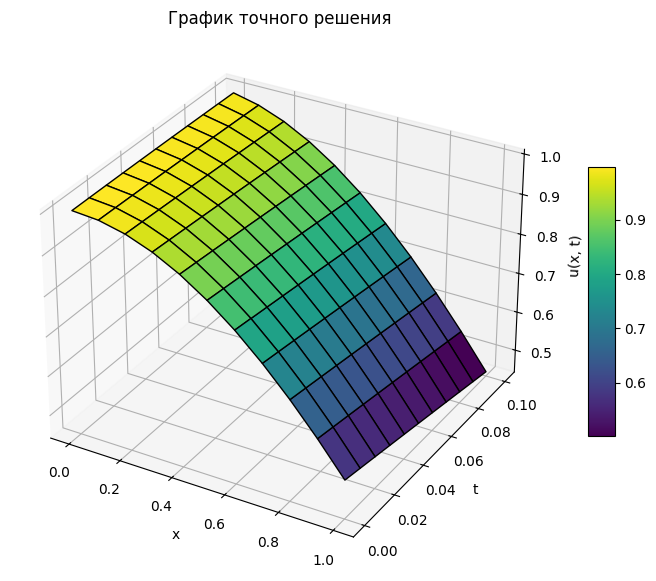

In [372]:
def print_exact():
    X, T = np.meshgrid(x_grid, t_grid)
    U = np.zeros_like(X)
    for i in range(T.shape[0]):
        U[i, :] = u(X[i, :], T[i, 0])
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X, T, U, cmap='viridis', edgecolor='k')
    
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u(x, t)')
    
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    
    plt.title('График точного решения')
    plt.show()

print_exact()

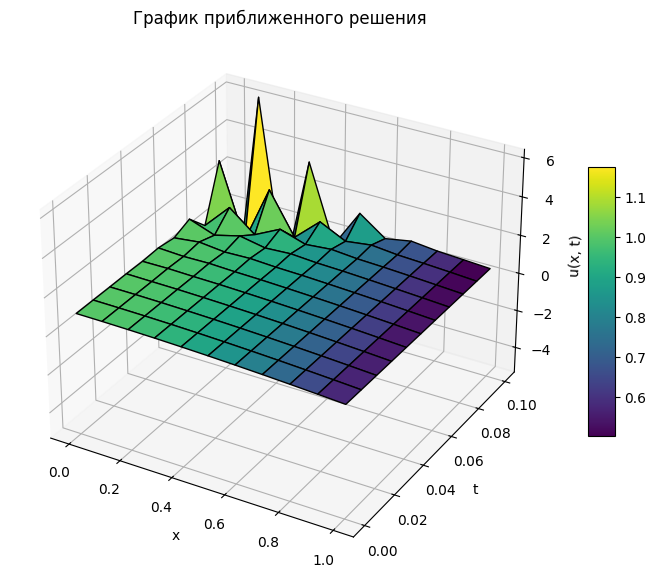

In [373]:
def print_approx():
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    X, T = np.meshgrid(x_grid, t_grid)
    
    Y = y.T
    
    surf = ax.plot_surface(X, T, Y, cmap='viridis', edgecolor='k')
    
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u(x, t)')
    
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    
    plt.title('График приближенного решения')
    plt.show()

print_approx()

Действительно, решение оказалось неустойчиво.

Построим сетку узлов по-другому

In [374]:
h, x_grid = generate_grid(1, 10)
tau, t_grid = generate_grid(0.1, 100)

In [375]:
print('tau=' + str(tau) + '\nh=' + str(h)) 

tau=0.001
h=0.1


Проверка неравенства Куранта

In [376]:
tau < h**2 / 2

True

Находим приближенное решение

In [377]:
y = diff_scheme_solve(x_grid, t_grid, h, tau, sigma, u_0, phi, mu_01, mu_1)

Имеем $\sigma = 0$, $\tau < h^2 / 2$, то есть разностная схема должна оказаться устойчивой

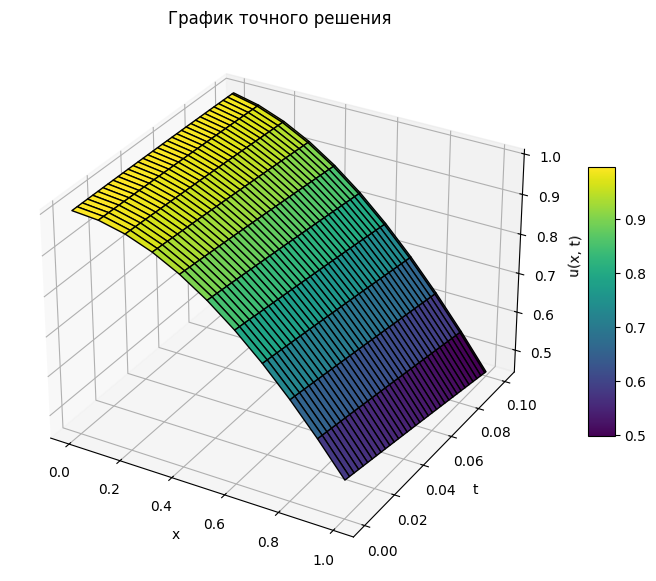

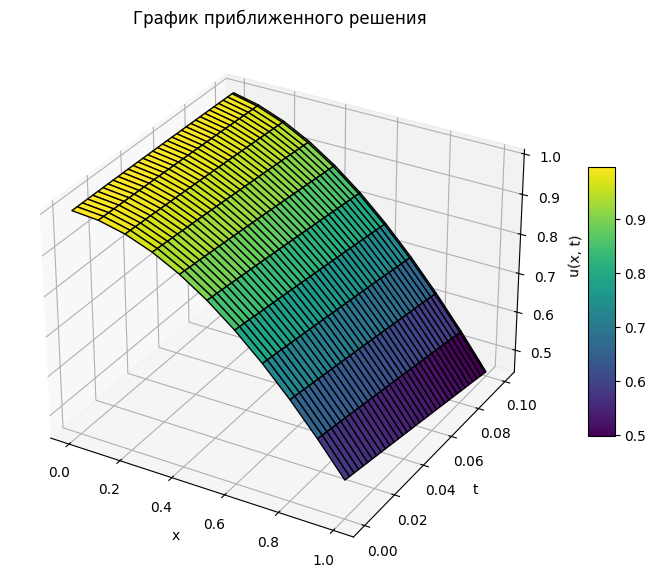

In [378]:
print_exact()
print_approx()

Аналогично, изменяя вариационные параметры, можем построить приближенные решения с более высокой погрешностью аппроксимации.

# Задача 2

In [280]:
def u_0(x):
    return np.cos(x)

def f(x,t):
    return 2*np.cos(x+t) + np.sqrt(2) * np.cos(np.pi/4 + x + t)

def mu_0(t):
    return np.cos(t)

def mu_1(t):
    return np.sin(t + 1)

def k(x,t):
    return np.cos(x+t) + 1

In [281]:
def diff_scheme_solve(x, t, h, tau, sigma, f, u_0, mu_0, mu_1, k):

    y = np.zeros((len(x), len(t)))

    for i in range(len(x)):
        y[i, 0] = u_0(x[i])

    for j in range(len(t)-1):
        gamma = [1]
        beta = [0]
        g = [mu_0(t[j+1])] 
        alpha = [0]
        for i in range(1, len(x)-1):
            alpha.append(sigma/h**2 * k(x[i] - h/2, t[j] + tau/2))
            gamma.append(-(sigma / h**2*(k(x[i] - h/2, t[j] + tau/2) + k(x[i] + h/2, t[j] + tau/2))+1/tau))
            beta.append(sigma/h**2*k(x[i] + h/2, t[j] + tau/2))
            g.append(-(1/tau*y[i,j] + (1-sigma)*(k(x[i] - h/2, t[j] + tau/2)*y[i-1, j] - k(x[i] - h/2, t[j] + tau/2)*y[i,j] - k(x[i] + h/2, t[j] + tau/2)*y[i,j] + k(x[i] + h/2, t[j] + tau/2)*y[i+1,j])/h**2 + f(x[i], t[j]+tau/2)))
        alpha.append(sigma/h)
        gamma.append(-sigma/h)
        g.append((1-sigma)/h*(y[len(x)-1, j] - y[len(x)-2,j]) + mu_1(t[j+1]))
        beta.append(0)
        y[:, j+1] = tridiagonal_algorithm(alpha,beta,gamma,g)

    return y

In [290]:
h, x_grid = generate_grid(1, 10)
tau, t_grid = generate_grid(0.1, 10)

In [291]:
print('tau=' + str(tau) + '\nh=' + str(h)) 

tau=0.01
h=0.1


In [298]:
sigma = 1

Находим приближенное решение

In [299]:
y = diff_scheme_solve(x_grid, t_grid, h, tau, sigma, f, u_0, mu_0, mu_1, k)

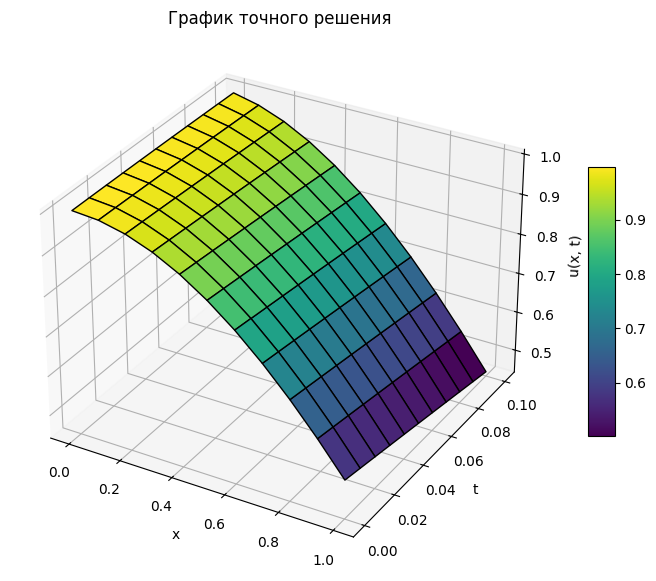

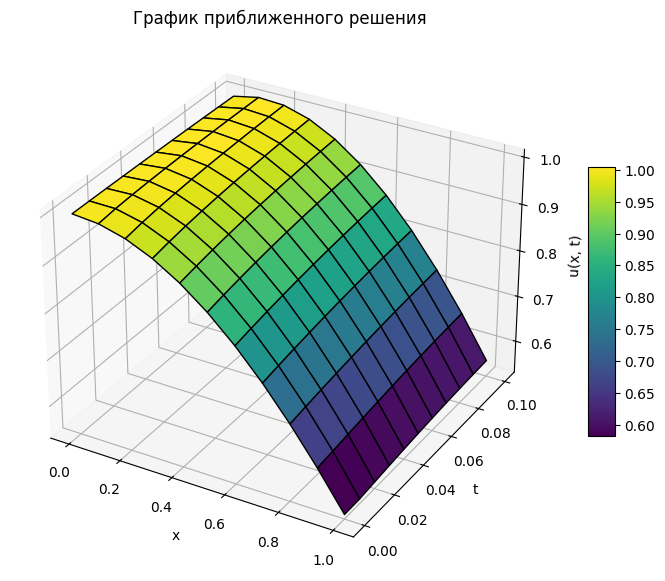

In [300]:
print_exact()
print_approx()